# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Manuel Eduardo Ochoa Obezo

- ID: A00227718

- My career: Ingeniero en Robotica


# Importing libraries

In [208]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# A1 Loa your dataset

In [209]:
url = "A00227718.csv"
ar = pd.read_csv(url)
ar

,ID,x1,x2
0,0,-1.457274,1.093038
1,1,-1.763838,2.321210
2,2,0.530845,3.012410
3,3,-4.537149,-0.601087
4,4,1.070596,5.140156
...,...,...,...
713,713,-7.215398,4.609216
714,714,-10.067797,5.528433
715,715,-7.298928,6.124493
716,716,-2.452068,1.910159


# A2 DataManagment


Print the first 7 rows

In [210]:
ar.head(7)

,ID,x1,x2
0,0,-1.457274,1.093038
1,1,-1.763838,2.321210
2,2,0.530845,3.012410
3,3,-4.537149,-0.601087
4,4,1.070596,5.140156
5,5,-0.319053,4.471438
6,6,2.891884,3.166712


Print the first 4 last rows

In [211]:
ar.tail(4)

,ID,x1,x2
714,714,-10.067797,5.528433
715,715,-7.298928,6.124493
716,716,-2.452068,1.910159
717,717,-1.444294,5.476217


How many rows and columns are in your data?

Use the `shape` method


In [212]:
ar.shape

(718, 3)

Print the name of all columns 

Use the `columns` method

In [213]:
ar.columns

Index(['ID', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [214]:
ar.dtypes

ID      int64
x1    float64
x2    float64
dtype: object

What is the meaning of rows and columns?

In [215]:
# Your responses here

# Las columnas nos indica que valor tiene cada variable, la primera es la numeracion de las vairbales
# y despues los valores de x1 y x2.


Print a statistical summary of your columns


In [216]:
ar.describe()

,ID,x1,x2
count,718.000000,718.000000,718.000000
mean,358.500000,-1.105546,5.122318
std,207.413034,5.645264,3.373555
min,0.000000,-12.073392,-2.363260
25%,179.250000,-5.379720,2.538325
50%,358.500000,-1.528137,4.733566
75%,537.750000,2.837227,7.489648
max,717.000000,11.284818,14.809302


In [217]:
# 1) What is the minumum and maximum values of each variable
    # Para la numeracion por logica el primero es 0, en x1 es -12 y en x2 es -2
# 2) What is the mean and standar deviation of each variable
    #De x1 la media es -1.105546 y la desviacion es 5.645
    #De x2 la media es 5.122318 y la desviacion es 3.373555
# 3) What the 25%, 50% and 75% represent?
    #si partieramos la lista en 4 partes, los valores que dan son los valores de los puntos donde se parte nuestra lista


Rename the columns using the same name with capital letters

In [218]:
ar = ar.rename(columns={"x1": "X1"})
ar = ar.rename(columns={"x2": "X2"})
ar 

,ID,X1,X2
0,0,-1.457274,1.093038
1,1,-1.763838,2.321210
2,2,0.530845,3.012410
3,3,-4.537149,-0.601087
4,4,1.070596,5.140156
...,...,...,...
713,713,-7.215398,4.609216
714,714,-10.067797,5.528433
715,715,-7.298928,6.124493
716,716,-2.452068,1.910159


Rename the columns to their original names

In [219]:
ar = ar.rename(columns={"X1": "x1"})
ar = ar.rename(columns={"X2": "x2"})
ar

,ID,x1,x2
0,0,-1.457274,1.093038
1,1,-1.763838,2.321210
2,2,0.530845,3.012410
3,3,-4.537149,-0.601087
4,4,1.070596,5.140156
...,...,...,...
713,713,-7.215398,4.609216
714,714,-10.067797,5.528433
715,715,-7.298928,6.124493
716,716,-2.452068,1.910159


Use two different alternatives to get one of the columns

In [220]:
print(ar.x1)
ar.iloc[:, 1]

0      -1.457274
1      -1.763838
2       0.530845
3      -4.537149
4       1.070596
         ...    
713    -7.215398
714   -10.067797
715    -7.298928
716    -2.452068
717    -1.444294
Name: x1, Length: 718, dtype: float64


0      -1.457274
1      -1.763838
2       0.530845
3      -4.537149
4       1.070596
         ...    
713    -7.215398
714   -10.067797
715    -7.298928
716    -2.452068
717    -1.444294
Name: x1, Length: 718, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [221]:
ar.loc[62:72,"x1":"x2"]

,x1,x2
62,-5.737001,2.871568
63,-4.493066,4.377170
64,-8.023777,4.545280
65,8.517601,10.757652
66,0.157683,5.974554
67,-5.360908,2.404113
68,-7.982976,3.290350
69,0.407252,3.716231
70,-9.534644,5.191058
71,5.751111,7.159134


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [222]:
ar.isnull().sum()

ID    0
x1    0
x2    0
dtype: int64

In [223]:
ar.notnull().sum()

ID    718
x1    718
x2    718
dtype: int64

Discard the first column


In [224]:
ar.drop(['ID'], axis=1, inplace=True)
ar

,x1,x2
0,-1.457274,1.093038
1,-1.763838,2.321210
2,0.530845,3.012410
3,-4.537149,-0.601087
4,1.070596,5.140156
...,...,...
713,-7.215398,4.609216
714,-10.067797,5.528433
715,-7.298928,6.124493
716,-2.452068,1.910159


### Questions 

Based on the previos reults, provide a description of yout dataset

Your response:
El DataSet es una lista con coordenadas, se hicieron ciertos procesos y llegamos a que la primera linea es innecesaria, por lo cual se descarto



# A3 Data visualization

Plot in the same figure the histogram of the two first two variables

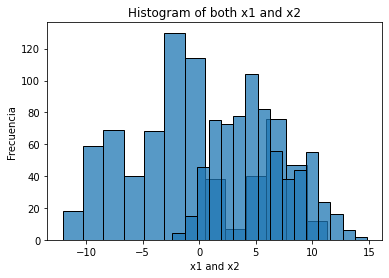

In [225]:
sns.histplot(ar["x1"], kde = False)
dfhist = sns.histplot(ar["x2"], kde = False)
dfhist.set_ylabel("Frecuencia")
dfhist.set_xlabel("x1 and x2")
dfhist.set_title("Histogram of both x1 and x2")

plt.show()



Based on this two plots, provide a description of your data:

Your response here: Esta muestra la frecuencia de los datos, tanto de x1 como de x2

Plot in the same figure the boxplot of the two first two variables 

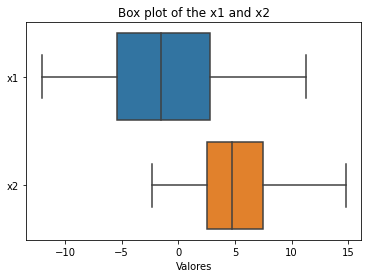

In [226]:
Box = ar.loc[:, ["x1", "x2"]]

box = sns.boxplot(data=Box, orient="h")
box.set_xlabel("Valores")
box.set_title("Box plot of the x1 and x2")

plt.show()

Scatter plot of the two first variables

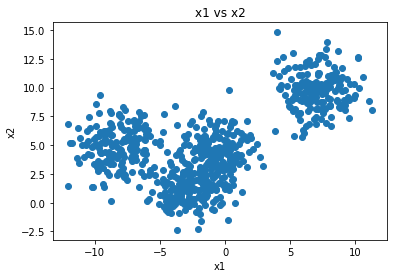

In [227]:
plt.scatter(ar.x1,ar.x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 vs x2')
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response: Mi dataset por lo que veo se suele incinar a estar en ciertos puntos, pudiendo notar algunos clusters




# A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorgind to your scatter plot

In [228]:
#crear objeto para hacer kmeans y definir el numero de clusters
km = KMeans(n_clusters = 3)

#Do kmeans
clusters = km.fit_predict(ar[["x1","x2"]])

clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2,
       1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0,
       2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0,
       2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2,

Add to your dataset a column with the assihned cluster to each data point

In [229]:
ar["cluster1"] = clusters

ar

,x1,x2,cluster1
0,-1.457274,1.093038,2
1,-1.763838,2.321210,2
2,0.530845,3.012410,2
3,-4.537149,-0.601087,2
4,1.070596,5.140156,2
...,...,...,...
713,-7.215398,4.609216,0
714,-10.067797,5.528433,0
715,-7.298928,6.124493,0
716,-2.452068,1.910159,2


Print the number associated to each cluster

In [230]:
ar.cluster1.unique()

array([2, 1, 0])

Print the centroids

In [231]:
km.cluster_centers_

array([[-8.12717446,  4.94948863],
       [ 6.97764807,  9.71900397],
       [-1.5844676 ,  2.88069599]])

Print the intertia metric

In [232]:
km.inertia_

4552.791737216003

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

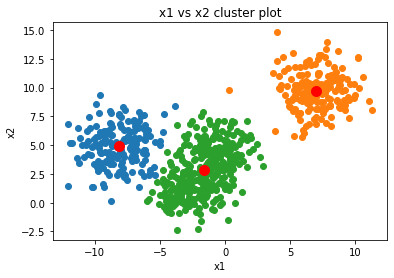

In [233]:
ar1 = ar[ar.cluster1==0]
ar2 = ar[ar.cluster1==1]
ar3 = ar[ar.cluster1==2]


plt.scatter(ar1.x1, ar1.x2)
plt.scatter(ar2.x1, ar2.x2)
plt.scatter(ar3.x1, ar3.x2)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='r', marker='o', s=100)

plt.title('x1 vs x2 cluster plot')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### Questions 

Provides a detailed description of your results

Your response: Como podemos ver de manera analitica, es muy buena idea tener 3 clusters por la reparticion de los datos

# A4 Elbow plot

Compute the Elbow plot

In [234]:
sse = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit_predict(ar[['x1', 'x2']])
    sse.append(km.inertia_)

C:\Users\manue\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'SSE')

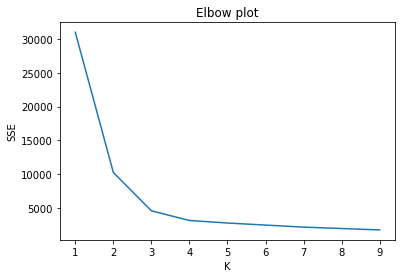

In [235]:
plt.plot(k_rng, sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')


### Questions 

What is the best number of clusters K? (argue your response)

Your response: Por la manera de analizar para un humano, puede notar que hay claramente 3 clusters, con el metodo de elbow podemos notas que los puntos criticos estan entre 3 y 4, siendo estos dos la cantidad mas indicada de clusters


Does this number of clusters agree with your inital guess? (argue your response)

Your response: Tal vez desconcuerda en uno pero siento que igual es muy inidicado



# A4 Normalizing the data: preprocessing using min max scaler


Normalize the data using min max scaler

In [236]:
scaler = MinMaxScaler()

scaler.fit(ar[['x1']])
ar['x1'] = scaler.transform(ar[['x1']])

scaler.fit(ar[['x2']])
ar['x2'] = scaler.transform(ar[['x2']])

Print a statistical summary of your columns (normalized data)

In [237]:
ar.describe()

,x1,x2,cluster1
count,718.000000,718.000000,718.000000
mean,0.469550,0.435903,1.239554
std,0.241682,0.196450,0.832396
min,0.000000,0.000000,0.000000
25%,0.286566,0.285431,0.000000
50%,0.451458,0.413265,1.000000
75%,0.638346,0.573759,2.000000
max,1.000000,1.000000,2.000000


In [238]:
# 1) What is the minumum and maximum values of each variable

ar.min()
ar.max()

# 2) What is the mean and standar deviation of each variable

ar.mean()
ar.std()

# 3) What the 25%, 50% and 75% represent?

    #los datos en los puntos de interseccion si dividieramos los datos en 4 partes iguales

# 4) Are the minimum and maximum values equal to your original data?

    #No, porque aqui esta escalado



x1          0.241682
x2          0.196450
cluster1    0.832396
dtype: float64

Plot the scatter plot of your normalizaed data

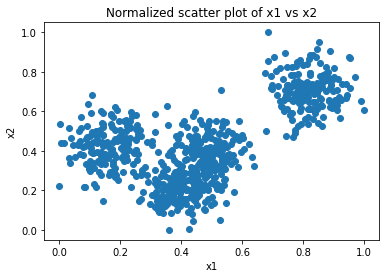

In [239]:
plt.scatter(ar.x1, ar.x2)
plt.title('Normalized scatter plot of x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Do Kmeans clustering assuming a number of clusters accorgind to your scatter plot

In [240]:
km = KMeans(n_clusters=3)

clusters = km.fit_predict(ar[['x1', 'x2']])
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1,
       0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0,
       1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2,
       0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0,

Add to your dataset a column with the assihned cluster to each data point

In [241]:
ar["cluster2"] = clusters

ar

,x1,x2,cluster1,cluster2
0,0.454492,0.201269,2,0
1,0.441367,0.272788,2,0
2,0.539606,0.313038,2,0
3,0.322638,0.102616,2,0
4,0.562714,0.436942,2,0
...,...,...,...,...
713,0.207978,0.406024,0,2
714,0.085863,0.459552,0,2
715,0.204402,0.494262,0,2
716,0.411903,0.248852,2,0


Print the centroids

In [242]:
km.cluster_centers_

array([[0.44845109, 0.30395536],
       [0.81435237, 0.70273095],
       [0.16932994, 0.42723564]])

Print the intetia metric

In [243]:
km.inertia_

12.316928789216941

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

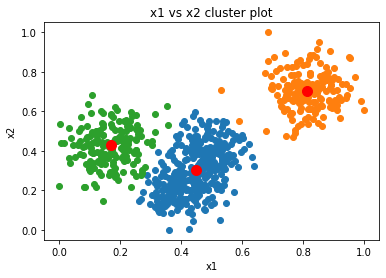

In [244]:
ar1 = ar[ar.cluster2==0]
ar2 = ar[ar.cluster2==1]
ar3 = ar[ar.cluster2==2]

plt.scatter(ar1.x1, ar1.x2)
plt.scatter(ar2.x1, ar2.x2)
plt.scatter(ar3.x1, ar3.x2)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='r', marker='o', s=100)

plt.title('x1 vs x2 cluster plot')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### Questions 

Provides a detailed description of your results. Does the normalization improves the clustering?

Your response: Como tal no es una diferencia muy grande por la cantidad de datos, pero en otros casos seria mu y util y mas para analizar estos datos de una manera estadistica

# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Creo que puedo comprender de una mejor panera estas cosas, por lo que siento que si me llevo algo bueno de sto

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: de una forma basica podria, pero nada muy diferente a la distribucion de datos que me han dado